In [1]:
# Instala a biblioteca mplfinance usando o pip, um gerenciador de pacotes para Python.
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.6 MB/s eta 0:00:00


In [2]:
import pandas as pd  # Importa a biblioteca pandas para manipulação de dados.
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib para plotagem de gráficos.
import matplotlib.dates as mdates  # Importa o módulo matplotlib.dates para manipulação de datas em gráficos.
import mplfinance as mpf  # Importa a biblioteca mplfinance para plotagem de gráficos financeiros.
import yfinance as yf  # Importa a biblioteca yfinance para obtenção de dados financeiros.
import plotly.graph_objects as go  # Importa a classe graph_objects da biblioteca plotly para plotagem interativa.
from plotly.subplots import make_subplots  # Importa a função make_subplots da biblioteca plotly.subplots para criar subplots em plotagens interativas.


In [3]:
# Utiliza a função download do módulo yfinance para baixar os dados históricos da ação da Petrobras (ticker 'PETR4.SA')
# no período de 1º de janeiro de 2023 a 31 de dezembro de 2023 e armazena esses dados na variável 'dados'.
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

dados

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,15.593499,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,15.198900,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,15.681946,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,16.246634,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,16.151382,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,32.056648,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,32.364971,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,32.884716,23466800


In [4]:
# Retorna os nomes das colunas do DataFrame 'dados', que contém os dados históricos baixados da ação da Petrobras.
dados.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
# Renomeia as colunas do DataFrame 'dados' para 'abertura', 'maximo', 'minimo', 'fechamento', 'fech_ajust' e 'volume'.
dados.columns = ['abertura', 'maximo', 'minimo', 'fechamento', 'fech_ajust', 'volume']
# Renomeia o índice do DataFrame 'dados' para 'data', o que facilita o entendimento dos dados pela coluna de datas.
dados = dados.rename_axis('data')

dados

,abertura,maximo,minimo,fechamento,fech_ajust,volume
data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,15.593499,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,15.198900,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,15.681946,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,16.246634,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,16.151382,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,32.056648,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,32.364971,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,32.884716,23466800


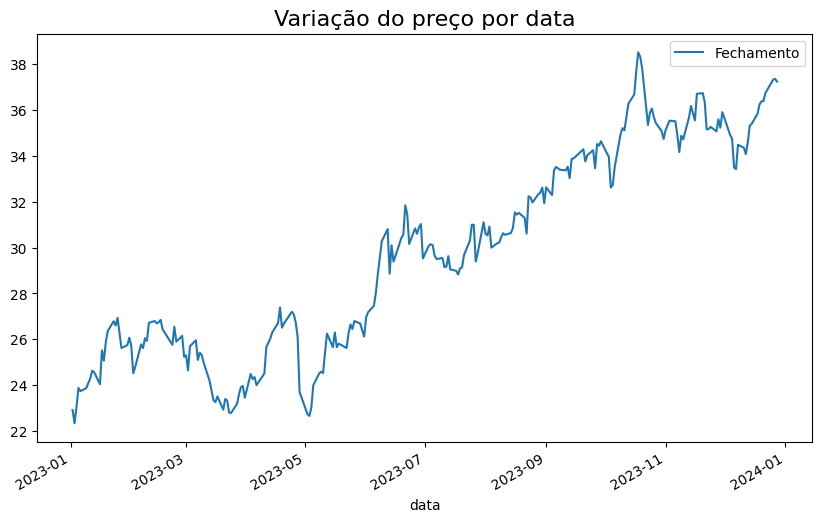

In [6]:
# Plota um gráfico de linha usando a coluna 'fechamento' do DataFrame 'dados'.
# O parâmetro 'figsize=(10,6)' define o tamanho da figura como 10 polegadas de largura por 6 polegadas de altura.
dados['fechamento'].plot(figsize=(10,6))

# Define o título do gráfico como 'Variação do preço por data' com tamanho da fonte de 16 pontos.
plt.title('Variação do preço por data', fontsize=16)

# Adiciona uma legenda ao gráfico, identificando a linha como 'Fechamento'.
plt.legend(['Fechamento'])

In [ ]:
# Cria uma cópia dos primeiros 60 registros do DataFrame 'dados' e atribui à variável 'df'.
df = dados.head(60).copy()
#Converte o indice em uma coluna de data
df['data'] = df.index
#Convertendo as datas para o formato numérico de matpltlib. Isso é necessario para que o Matplotlib possa plotar (montar/desenhar) as datas no grafico
df['data'] = df['data'].apply(mdates.date2num)

df

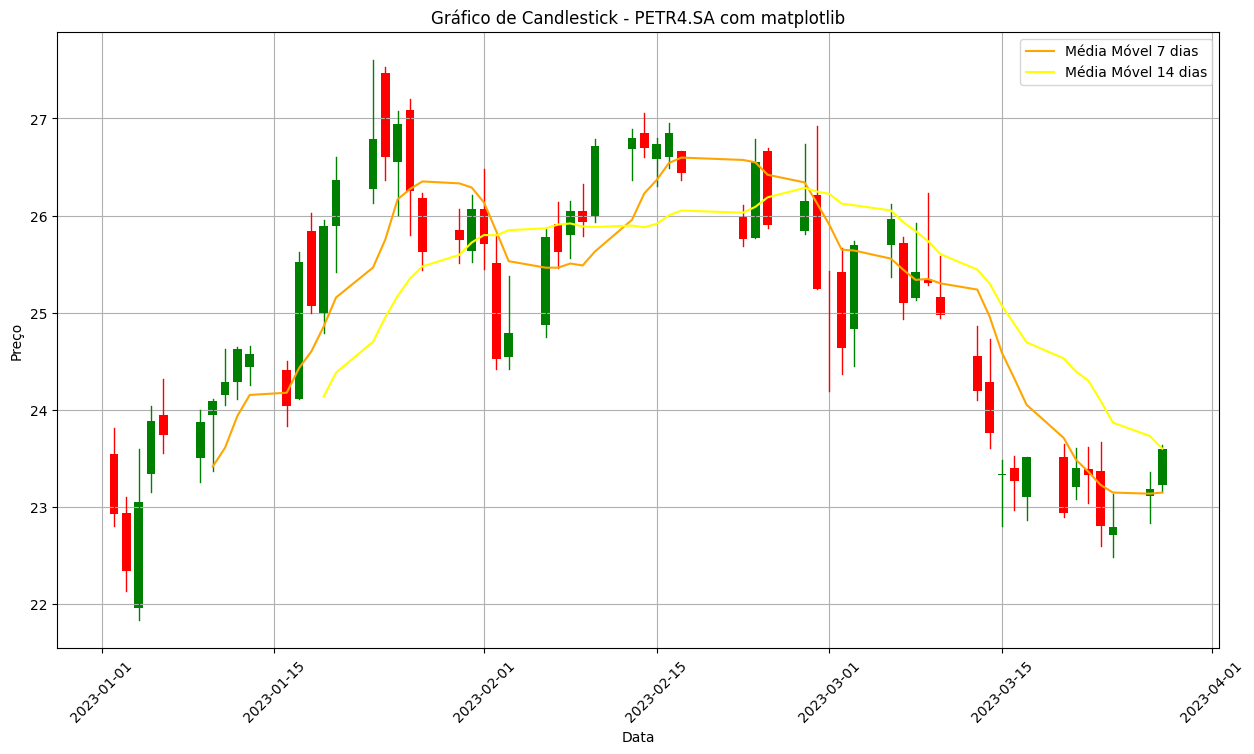

In [ ]:
from pathlib import WindowsPath
# Cria uma figura e um conjunto de eixos usando a função subplots do matplotlib. O parâmetro 'figsize=(15,8)' define o tamanho da figura como 15 polegadas de largura por 8 polegadas de altura.
fig, ax = plt.subplots(figsize=(15,8))
# Define a largura das barras como 0.7
width = 0.7

# Itera sobre os índices do DataFrame 'df' usando a função range e len.
for i in range(len(df)):
    # Verifica se o preço de fechamento é maior que o preço de abertura para o índice 'i'.
    if df['fechamento'].iloc[i] > df['abertura'].iloc[i]:
        color = 'green'  # Define a cor como verde se o preço de fechamento for maior que o preço de abertura.
    else:
        color = 'red'  # Define a cor como vermelha se o preço de fechamento for menor ou igual ao preço de abertura.

    # Plota uma linha vertical no gráfico, representando o intervalo entre os valores mínimo e máximo para o índice 'i'.
    ax.plot([df['data'].iloc[i], df['data'].iloc[i]], # Utiliza os valores da coluna 'data' como coordenadas x e os valores das colunas 'minimo' e 'maximo' como coordenadas y.
        [df['minimo'].iloc[i], df['maximo'].iloc[i]],
        color=color, # A cor da linha é determinada pela variável 'color' definida anteriormente no loop.
        linewidth=1) # O parâmetro 'linewidth=1' define a largura da linha como 1 pixel.

    # Adiciona um retângulo ao gráfico usando a função Rectangle do matplotlib.
    # O retângulo é definido pelas coordenadas do canto inferior esquerdo, largura, altura e cor de preenchimento.
    # As coordenadas do canto inferior esquerdo são ajustadas para centrar o retângulo na data correspondente,
    # subtraindo metade da largura 'width' do valor da data.
    # A altura do retângulo é calculada como a diferença entre os preços de abertura e fechamento para o índice 'i'.
    ax.add_patch(plt.Rectangle((df['data'].iloc[i] - width/2, min(df['abertura'].iloc[i], df['fechamento'].iloc[i])),
                           width,
                           abs(df['fechamento'].iloc[i] - df['abertura'].iloc[i]),
                           facecolor=color))

# Calcula a média móvel de 7 dias (MA7) para a coluna 'fechamento' e armazena os resultados na nova coluna 'MA7'.
df['MA7'] = df['fechamento'].rolling(window=7).mean()

# Calcula a média móvel de 14 dias (MA14) para a coluna 'fechamento' e armazena os resultados na nova coluna 'MA14'.
df['MA14'] = df['fechamento'].rolling(window=14).mean()


# Plota a média móvel de 7 dias (MA7) em relação à data, com a cor laranja e etiqueta 'Média Móvel 7 dias'.
ax.plot(df['data'], df['MA7'], color='orange', label='Média Móvel 7 dias')
# Plota a média móvel de 14 dias (MA14) em relação à data, com a cor amarela e etiqueta 'Média Móvel 14 dias'.
ax.plot(df['data'], df['MA14'], color='yellow', label='Média Móvel 14 dias')

# Adiciona uma legenda ao gráfico para identificar as séries plotadas.
ax.legend()

# Define o formato da escala do eixo x como datas.
ax.xaxis_date()
# Define o formato dos rótulos principais do eixo x como ano-mês-dia.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# Rotaciona os rótulos do eixo x em 45 graus para melhorar a legibilidade.
plt.xticks(rotation=45)

# Define o título do gráfico.
plt.title('Gráfico de Candlestick - PETR4.SA com matplotlib')
# Define o rótulo do eixo x como 'Data'.
plt.xlabel('Data')
# Define o rótulo do eixo y como 'Preço'.
plt.ylabel('Preço')

# Ativa as linhas de grade no gráfico, para facilitar a visualização.
plt.grid(True)

# Exibe o gráfico.
plt.show()


In [ ]:
#Criando subplots

'''
Primeiro, criamos uma figura que conterá nossos gráficos usanod make_subplots.
Isso nos permite ter multiplos gráficos em uma única visualização.
Aqui, teremos dois subtipos: um para o gráfico de candlestick; outro para o volume de transações.
'''

fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.2,
                    subplot_titles=('Candlestick', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura.
'''
#Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['abertura'],
                             high=df['maximo'],
                             low=df['minimo'],
                             close=df['fechamento'],
                             name='Candlestick'),
              row=1, col=1)

#Adicionando as mídias móveis
#Adicionamos também mídias móveis ao mesmo suplot para a análise de tendencias
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 dias'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 dias'),
              row=1, col=1)

#Adicionando o gráfico de barras para o volume
#Em seguida, criamos um gráfico de barras para o valume de trasações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['volume'],
                     name='Volume'),
              row=2, col=1)
#Atualizando layout
#Finalmente configuramos o layout, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legivel
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False, #Desativa o range slider
                  width=1100, height=600)

fig.show()